# Angiogenesis

## Introduction

Switch to Clojure kernel

In [ ]:

%classpath add mvn joda-time joda-time 2.9.9
%classpath add mvn clj-sparql clj-sparql 0.2.0
%classpath add jar .
;; (load-file "boutros/matsu/compiler.clj")
(require 'sparqler.core)
;; (require 'sparqler.queries)

In [ ]:
%load_ext sql

In [ ]:
(refer 'sparqler.core)
(assert kabob)

## Query

### Manual SPARQL

Switch to SPARQL Kernel


In [1]:
%lsmagics

Available magics:
%display  %endpoint  %format  %graph  %lang  %log  %lsmagics  %outfile  %prefix  %show

%display raw | table [withtypes] | diagram [svg|png] [withliterals] : set display format
%endpoint url : set SPARQL endpoint. REQUIRED.
%format JSON | N3 | any | default : set requested result format
%graph uri : set default graph for the queries
%lang <lang> [...] | default | all : language(s) preferred for labels
%log critical | error | warning | info | debug : set logging level
%lsmagics  : list all magics
%outfile <filename> | NONE : save raw output to a file (use "%d" in name to add cell number, "NONE" to cancel saving)
%prefix uri : set a persistent URI prefix for all queries
%show <n> | all : maximum number of shown results

Endpoint set to: http://dbpedia.org/sparql
Label preferred languages: ['en']
Output file: test.n3
Return format: N3
Display: svg
Label preferred languages: ['en']

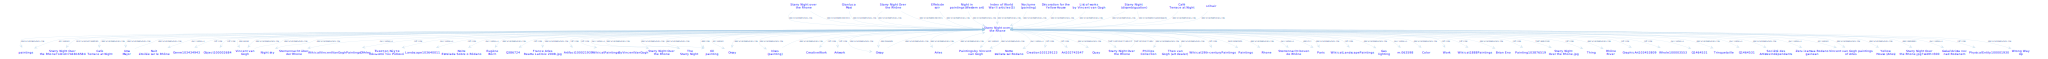

In [2]:
%endpoint http://dbpedia.org/sparql
%lang en
%outfile test.json
%format n3
%display diagram svg
%lang en

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
DESCRIBE dbr:Starry_Night_Over_the_Rhone

In [ ]:
%%javascript



In [ ]:
%endpoint http://amc-tantor.ucdenver.pvt:10035/repositories/kabob-dev
%display table withtypes
%format json


PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX oboMeta: <http://www.geneontology.org/formats/oboInOwl#>
PREFIX kiao: <http://kabob.ucdenver.edu/iao/>
PREFIX iaouniprot: <http://kabob.ucdenver.edu/iao/uniprot/>
PREFIX franzOption_clauseReorderer: <franz:identity>
PREFIX franzOption_chunkProcessingAllowed: <franz:yes>
PREFIX franzOption_memoryLimit: <franz:60g>
PREFIX franzOption_memoryExhaustionWarningPercentage: <franz:90.0>

SELECT DISTINCT ?angioSubs ?partProtId ?intProtId  

WHERE {

  #select angiogenesis GOBPs and its subclasses that are in the OBO namespace
  
  ?angioSubs rdfs:subClassOf* obo:GO_0001525 . #angiogenesis
  ?angioSubs oboMeta:hasOBONamespace ?OBONamespace . #OBO ns (BPs)

  #restriction - only want human proteins that participate in these GOBPs
  
  ?anonSubclass rdfs:subClassOf ?angioSubs .
  ?anonSubclass rdfs:subClassOf ?protRest .

  ?protRest rdf:type owl:Restriction .
  ?protRest owl:onProperty obo:RO_0000057 . #has_participant
  ?protRest owl:someValuesFrom ?protSub .

  ?protSub rdfs:subClassOf ?protClass .
  ?protClass rdfs:subClassOf* obo:CHEBI_36080 . #protein
  ?partProtId obo:IAO_0000219 ?protClass .

  ?protClass rdfs:subClassOf ?taxonRest .
  ?taxonRest owl:onProperty obo:RO_0002162 . #in taxon
  ?taxonRest owl:someValuesFrom obo:NCBITaxon_9606 . #human

  #swisprot ids – participating proteins
  ?idField obo:IAO_0000219 ?partProtId .
  ?idField kiao:hasTemplate iaouniprot:UniProtFileRecord_primaryAccessionDataField1 .
  ?record obo:BFO_0000051 ?idField .
  ?record obo:BFO_0000051 ?nameField .
  ?nameField kiao:hasTemplate iaouniprot:UniProtFileRecord_nameDataField1 .
  ?nameField obo:IAO_0000219 ?partProtName . # uniprot name

  #protein interactions
  ?protSub2 rdfs:subClassOf ?protClass .
  ?r_hasp owl:someValuesFrom ?protSub2 .
  ?r_hasp rdf:type owl:Restriction .
  ?r_hasp owl:onProperty obo:RO_0000057 . #has_participant

  ?interaction rdfs:subClassOf ?r_hasp .
  ?interaction rdfs:subClassOf ?rcard .
  ?rcard owl:cardinality 2 . # require 2 participants for a binary interaction
  ?rcard owl:onProperty obo:RO_0000057 . #has_participant

  ?interaction rdfs:subClassOf ?r_hasp2 .
  ?r_hasp2 rdf:type owl:Restriction .
  ?r_hasp2 owl:onProperty obo:RO_0000057 . #has_participant \n
  ?r_hasp2 owl:someValuesFrom ?protSub3 .

  ?protSub3 rdfs:subClassOf ?protClass3 .
  ?protClass3 rdfs:subClassOf ?taxonRest .
  ?protClass3 rdfs:subClassOf* obo:CHEBI_36080 . #protein
  ?intProtId obo:IAO_0000219 ?protClass3 .

  FILTER (?protSub3 != ?protSub2) .

  #swisprot ids – participating-protein’s protein interaction partner names
  ?idField2 obo:IAO_0000219 ?intProtId . #field denotes ice id
  ?idField2 kiao:hasTemplate iaouniprot:UniProtFileRecord_primaryAccessionDataField1 .
  ?record2 obo:BFO_0000051 ?idField2 . #record has part id field (column)
  ?record2 obo:BFO_0000051 ?nameField2 . #record has part name field
  ?nameField2 kiao:hasTemplate iaouniprot:UniProtFileRecord_nameDataField1 .
  ?nameField2 obo:IAO_0000219 ?intProtName . # uniprot name
  }

In [ ]:
// %%javascript
// beakerx.query1 = beakerx.getCodeCells('query1')[0].code

#### Manual Query Through Endpoint - JSON Result

In [ ]:
(def query1 (beakerx :get "query1"))
(def qexec1 (doto (QueryExecutionFactory/sparqlService (get kabob :endpoint) query1) (.setBasicAuthentication (get kabob :user) (char-array (get kabob :pass)))))
(beakerx :set "qexec1" (str qexec1))

In [ ]:
(def result1 (.execSelect qexec1))

In [ ]:
(def outputStream (ByteArrayOutputStream.))
(ResultSetFormatter/outputAsJSON outputStream result1)
(def json1 (String. (.toByteArray outputStream)))
(beakerx :set "json1" json1)

In [ ]:
%%javascript
JSON.parse(beakerx.json1).results.bindings.length

#### Manual Query Through Endpoint - HASHMAP result 

In [ ]:
(def result1 (kabob-query (beakerx :get "query1")))

In [ ]:
(count result1)

In [ ]:
;(webview-query (beakerx :get "query1"))

### SPARQLer

In [ ]:
(in-ns 'sparqler.core)

(defquery sparqler-query []
  
  (prefix "PREFIX franzOption_clauseReorderer: <franz:identity>
PREFIX franzOption_chunkProcessingAllowed: <franz:yes>
PREFIX franzOption_memoryLimit: <franz:80g>
PREFIX franzOption_queryTimeout: <franz:600>
PREFIX franzOption_logQuery: <franz:yes>
PREFIX franzOption_memoryExhaustionWarningPercentage: <franz:90.0>\n")
  
  (select-distinct :angioSubs :partProtId :intProtId)
  
  (where
  
   (!# "VEGF - angiogenesis GOBP/subclasses, the proteins that participate in those GOBPs, and their protein-protein interactions")
    
   (!# "select angiogenesis GOBPs and its subclasses that are in the OBO namespace")
   (of-biological-process :angioSubs GO:angiogenesis)
   
   (!# "restriction only want human proteins that participate in these GOBPs")
   (proteins-that-participates-in :protClass :angioSubs)
   
   (denotes :partProtId :protClass)
   
   (in-taxon obo:human :protClass)
   
   (!# "swisprot ids participating proteins")
   (swissprot-name :partProtId :partProtName)

   (!# "protein interactions")
   (with-interactions :protClass :intProtId)

   (!# "swisprot ids – participating-protein’s protein interaction partner names")
   (swissprot-name :intProtId :intProtName)
   ))

In [ ]:
(def query2 (boutros.matsu.util/pprint (sparqler.core/sparqler-query)))
;; (beakerx :set "query2" query2)
query2

#### SPARQLer WebView

In [ ]:
(def query2-url (webview-query query2))

#### SPARQLer JSON Response

In [ ]:
(def qexec2 (doto (QueryExecutionFactory/sparqlService (get kabob :endpoint) (beakerx :get "query2")) (.setBasicAuthentication (get kabob :user) (char-array (get kabob :pass)))))
;; (beakerx :set "qexec2" (str qexec2))

In [ ]:
(import java.net.URI
           [java.net URLEncoder URLDecoder])
(def url2 (str "http://amc-tantor.ucdenver.pvt:10035/repositories/kabob-dev?query="
                (clojure.string/replace (URLEncoder/encode query2 "UTF-8") "+" "%20")))
 (clojure.java.browse/browse-url url2)
 (beakerx :set "url2" url2)

In [ ]:
%%javascript
beakerx.url2

In [ ]:
%%javascript
var xhr = new XMLHttpRequest();
xhr.open('GET', beakerx.url2, false);
xhr.send();
print(xhr.responseText);

In [ ]:
(def result2 (.execSelect qexec2))

In [ ]:
(def outputStream (ByteArrayOutputStream.))
(ResultSetFormatter/outputAsJSON outputStream result2)
(def json2 (String. (.toByteArray outputStream)))
(beakerx :set "json2" json2)

In [ ]:
%%javascript
JSON.parse(beakerx.json1).results.bindings.length

#### diff Manual vs SPARQLer

In [ ]:
%%html
<pre id="display"></pre>

In [ ]:
%%javascript
document.getElementById("display").innerHTML = "";

var one = beakerx.query1,
    other = beakerx.query2,
    color = 'blue',
    span = null;

var diff = JsDiff.diffChars(one, other),
    display = document.getElementById('display'),
    fragment = document.createDocumentFragment();

diff.forEach(function(part){
  // green for additions, red for deletions
  // grey for common parts
  color = part.added ? 'green' :
    part.removed ? 'red' : 'grey';
  span = document.createElement('span');
  span.style.color = color;
  span.appendChild(document
    .createTextNode(part.value));
  fragment.appendChild(span);
});

display.appendChild(fragment);

#### HashMap response

In [ ]:
(def result2 (kabob-query (beakerx :get "query2")))

In [ ]:
(def outputStream (ByteArrayOutputStream.))
(ResultSetFormatter/outputAsJSON outputStream results)
(def json (String. (.toByteArray outputStream)))
(beakerx :set "resultjson" json)

In [ ]:
(webview-query (beakerx :get "query2"))